In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

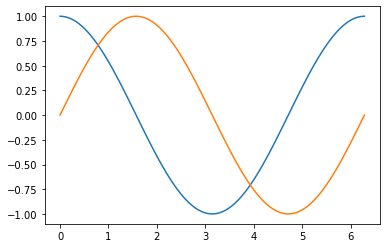

In [3]:
X = np.linspace(0, 2*np.pi, 100, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

plt.show()

In [9]:
m_cos = C.reshape((10,10))
m_cos = pd.DataFrame(m, columns=['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9'])
m_cos

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9
0,1.000000,0.997987,0.991955,0.981929,0.967949,0.950071,0.928368,0.902927,0.873849,0.841254
1,0.805270,0.766044,0.723734,0.678509,0.630553,0.580057,0.527225,0.472271,0.415415,0.356886
2,0.296920,0.235759,0.173648,0.110838,0.047582,-0.015866,-0.079250,-0.142315,-0.204807,-0.266474
3,-0.327068,-0.386345,-0.444067,-0.500000,-0.553920,-0.605610,-0.654861,-0.701475,-0.745264,-0.786053
4,-0.823677,-0.857983,-0.888835,-0.916108,-0.939693,-0.959493,-0.975430,-0.987439,-0.995472,-0.999497
5,-0.999497,-0.995472,-0.987439,-0.975430,-0.959493,-0.939693,-0.916108,-0.888835,-0.857983,-0.823677
6,-0.786053,-0.745264,-0.701475,-0.654861,-0.605610,-0.553920,-0.500000,-0.444067,-0.386345,-0.327068
7,-0.266474,-0.204807,-0.142315,-0.079250,-0.015866,0.047582,0.110838,0.173648,0.235759,0.296920
8,0.356886,0.415415,0.472271,0.527225,0.580057,0.630553,0.678509,0.723734,0.766044,0.805270
9,0.841254,0.873849,0.902927,0.928368,0.950071,0.967949,0.981929,0.991955,0.997987,1.000000


In [5]:
# m = []
# col = []
# i = 0

# while(i < len(X)):
#     for j in range(0, 10):
#         col.append(C[i])
#         i += 1
#     m.append(col)
#     col = []

    
# m = pd.DataFrame(m, columns=['t0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9'])
# print(m)